Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [4]:
# first, we're doing linear regression,
# so let's get rid of boolean/categorical
# features (in the name of doing the assignment)
coolcols = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price']
df = df[coolcols]
df.head()

,bathrooms,bedrooms,latitude,longitude,price
0,1.5,3,40.7145,-73.9425,3000
1,1.0,2,40.7947,-73.9667,5465
2,1.0,1,40.7388,-74.0018,2850
3,1.0,1,40.7539,-73.9677,3275
4,1.0,4,40.8241,-73.9493,3350


In [5]:
# just make sure everything is
# on the up and up
df.dtypes

bathrooms    float64
bedrooms       int64
latitude     float64
longitude    float64
price          int64
dtype: object

In [6]:
df.isnull().sum()

bathrooms    0
bedrooms     0
latitude     0
longitude    0
price        0
dtype: int64

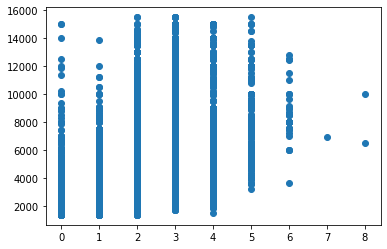

In [7]:
# plot bedrooms against price
import matplotlib.pyplot as plt
plt.scatter(df['bedrooms'], df['price'])
plt.show()

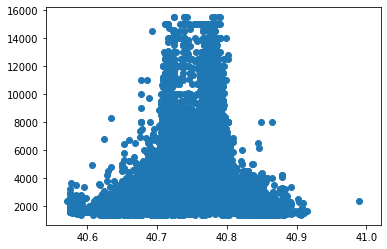

In [8]:
# plot latitude against price
plt.scatter(df['latitude'], df['price'])
plt.show()
# for some reason, I chose this

In [0]:
# split our data for training/testing/validating purposes
from sklearn.model_selection import train_test_split
X_cols = ['latitude']
y_col = 'price'
X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[y_col])
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test)

In [0]:
# create the thing that does the predicting
# just for fun, let's perform some
# "hypertuning" in "parallel"
from sklearn.linear_model import LinearRegression
m1 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
m2 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
m3 = LinearRegression(fit_intercept=False, copy_X=True)

In [11]:
# fit the models
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(36613, 1)
(9153, 1)
(3052, 1)


In [12]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(36613,)
(9153,)
(3052,)


In [0]:
# get the predictions
m1_y = m1.predict(X_test)
m2_y = m2.predict(X_test)
m3_y = m3.predict(X_test)

In [0]:
# rank the predictions
from sklearn.metrics import r2_score
s1 = r2_score(y_test, m1_y)
s2 = r2_score(y_test, m2_y)
s3 = r2_score(y_test, m3_y)

In [15]:
# how'd we do?
results = [('model 1', m1.coef_[0], s1), ('model 2', m2.coef_[0], s2), ('model 3', m3.coef_[0], s3)]
print(results[0])
print(results[1])
print(results[2])

('model 1', -1798.6326164079985, 0.00018436328462989593)
('model 2', -1798.632616407999, 0.00018436328463000695)
('model 3', 87.90002734249617, -0.00015839317878674208)


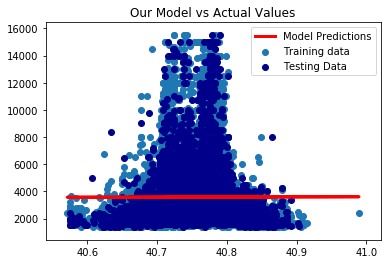

In [16]:
# let's take a look at these models
# actually, 1 & 2 are the same, and render
# the plot unrecognizable; we'll just plot model 3
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, color='darkblue', label='Testing Data')
plt.plot(df[X_cols], df[X_cols] * m3.coef_[0], color="red", linewidth=3, label='Model Predictions')
plt.title('Our Model vs Actual Values')
plt.legend()
plt.show()

In [0]:
# using this model, let's make a function
# for new predictions going forward
def what_does_the_model_think(X, y):
  plt.scatter(X, y, label='True data')
  plt.plot(X, X * m3.coef_[0], color='red', label='Predictions')
  plt.title('Our Model vs Actual Values')
  plt.legend()
  plt.show()

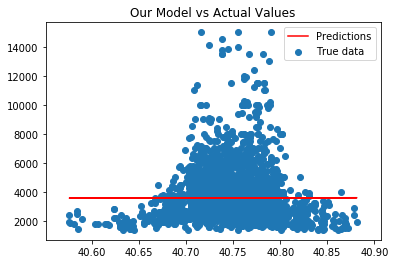

In [18]:
# let's test it out with our validation data
what_does_the_model_think(X_val, y_val)